# KNN - Diabetes Prediction

Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

<b>Pregnancies</b>: Number of times pregnant <br>
<b>Glucose</b>: Plasma glucose concentration a 2 hours in an oral glucose tolerance test <br>
<b>BloodPressure</b>: Diastolic blood pressure (mm Hg) <br> 
<b>SkinThickness</b>: Triceps skin fold thickness (mm) <br> 
<b>Insulin</b>: 2-Hour serum insulin (mu U/ml) <br>
<b>BMI</b>: Body mass index (weight in kg/(height in m)^2) <br> 
<b>DiabetesPedigreeFunction</b>: Diabetes pedigree function <br>
<b>Age</b>: Age (years) <br>
<b>Outcome</b>: Class variable (0 or 1) <br>

In [2]:
# import libraries

import  pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# read dataset

dataaset = pd.read_csv('diabetes.csv')

In [5]:
dataaset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
dataaset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
dataaset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
dataaset.columns


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [11]:
X = dataaset[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']]

Y = dataaset['Outcome']

In [12]:
# train test split

from sklearn.model_selection import train_test_split

X_train , X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

In [13]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
334,1,95,60,18,58,23.9,0.260,22
139,5,105,72,29,325,36.9,0.159,28
485,0,135,68,42,250,42.3,0.365,24
547,4,131,68,21,166,33.1,0.160,28
18,1,103,30,38,83,43.3,0.183,33
...,...,...,...,...,...,...,...,...
71,5,139,64,35,140,28.6,0.411,26
106,1,96,122,0,0,22.4,0.207,27
270,10,101,86,37,0,45.6,1.136,38
435,0,141,0,0,0,42.4,0.205,29


In [16]:
## Standardisation

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
classifier = KNeighborsClassifier(n_neighbors=5, algorithm='auto')

classifier.fit(X_train, Y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [19]:
y_pred = classifier.predict(X_test)

In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [24]:
print(f"confusion_matrix: {confusion_matrix(y_pred, Y_test)}")
print(f"Accuracy : {accuracy_score(y_pred, Y_test)}")
print(f"classification_report : {classification_report(y_pred, Y_test)}")

confusion_matrix: [[114  35]
 [ 37  45]]
Accuracy : 0.6883116883116883
classification_report :               precision    recall  f1-score   support

           0       0.75      0.77      0.76       149
           1       0.56      0.55      0.56        82

    accuracy                           0.69       231
   macro avg       0.66      0.66      0.66       231
weighted avg       0.69      0.69      0.69       231



In [25]:
# Hyper parameter Tunning

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


In [26]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])


In [27]:
param_grid = {
    'knn__n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15],
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan', 'minkowski'],
    'knn__p': [1, 2]        # 1 = Manhattan, 2 = Euclidean
}


In [29]:
grid = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,              # 5-fold cross validation
    scoring='accuracy',
    n_jobs=-1           # use all CPU cores
)

grid.fit(X_train, Y_train)


,estimator,Pipeline(step...lassifier())])
,param_grid,"{'knn__metric': ['euclidean', 'manhattan', ...], 'knn__n_neighbors': [1, 3, ...], 'knn__p': [1, 2], 'knn__weights': ['uniform', 'distance']}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,copy,True


In [30]:
print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)


Best Parameters: {'knn__metric': 'manhattan', 'knn__n_neighbors': 13, 'knn__p': 1, 'knn__weights': 'distance'}
Best Score: 0.7765316718587746


In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = grid.predict(X_test)

print("Test Accuracy:", accuracy_score(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))


Test Accuracy: 0.7142857142857143
[[126  25]
 [ 41  39]]
              precision    recall  f1-score   support

           0       0.75      0.83      0.79       151
           1       0.61      0.49      0.54        80

    accuracy                           0.71       231
   macro avg       0.68      0.66      0.67       231
weighted avg       0.70      0.71      0.71       231



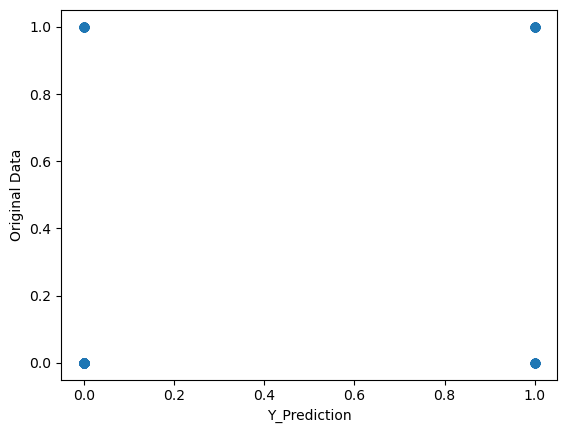

In [35]:
plt.scatter(y_pred, Y_test)
plt.xlabel("Y_Prediction")
plt.ylabel("Original Data")
plt.show()

In [36]:
import pickle

pickle.dump(scaler,open('scaler.pkl','wb'))

pickle.dump(grid,open("grid.pkl", "wb"))